# <b> <u>Introduction: What is Logistic Regression? </u></b>

### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

### In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

### where:

- ### $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- ### By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

### This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

### Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$ 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

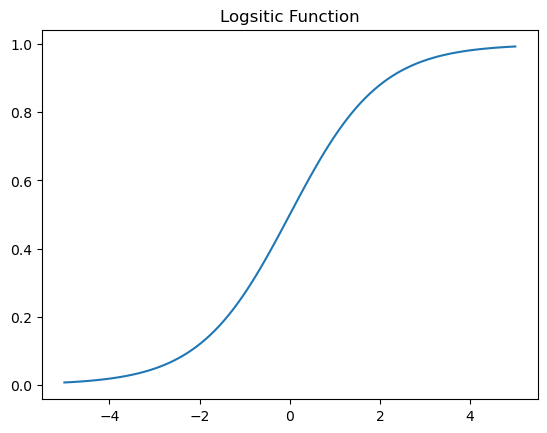

In [5]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.title('Logsitic Function')
plt.show()

## Dataset Initialization

In [6]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
#Undestanding the dataset 
print('Dataset Size')
print('Rows {} Columns {}'.format(data.shape[0], data.shape[1]))

Dataset Size
Rows 7043 Columns 21


In [6]:
print("Column and Datatypes")
pd.DataFrame(data.dtypes)

Column and Datatypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df = data.copy()

That's a lot columns, to simplyfy our experiment we will only use 2 features `tenure` and `Churn`




### EDA : Independent Variables

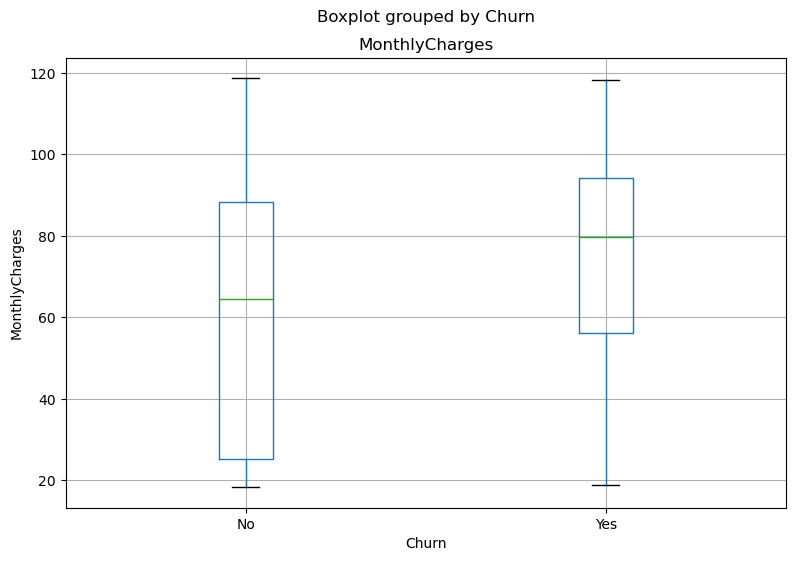

In [8]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column = "MonthlyCharges" , by = "Churn", ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

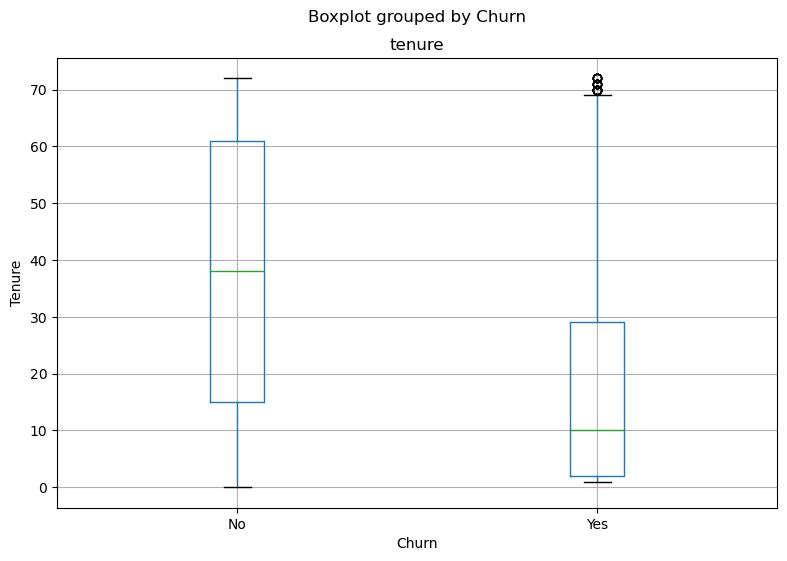

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column = "tenure" , by = "Churn", ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [10]:
df['class'] = df['Churn'].apply(lambda x :1 if x =='Yes' else 0)

# features will be saved as X and our target will be saved as y
X = df[['tenure', 'MonthlyCharges']].copy()
y = df['class'].copy()

In [11]:
df.shape

(7043, 22)

## Splitting data into train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state= 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [13]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [14]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## Fitting Logistic regression on train data

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True , max_iter= 10000)
clf.fit(X_train , y_train)

LogisticRegression(max_iter=10000)

In [16]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [17]:
# Get the model coefficient
clf.coef_

array([[-0.05646728,  0.03315385]])

In [18]:
clf.intercept_

array([-1.77408975])

## <b>Evaluating the performance of the trained model

In [19]:
#Get the predicted Probabilities 
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [20]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [21]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [22]:
train_preds = clf.predict_proba(X_train)[:, 1]
test_preds = clf.predict_proba(X_test)[: , 1]

In [23]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [24]:
#Get the Predicted Classes 
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [25]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [27]:
# Get the accuracy score
train_accuracy = accuracy_score(train_class_preds , y_train)
test_accuracy = accuracy_score(test_class_preds , y_test)

print('The accuracy on the train data is ' , train_accuracy)
print('The accuracy on the test data is ' , test_accuracy)

The accuracy on the train data is  0.7857649982250621
The accuracy on the test data is  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

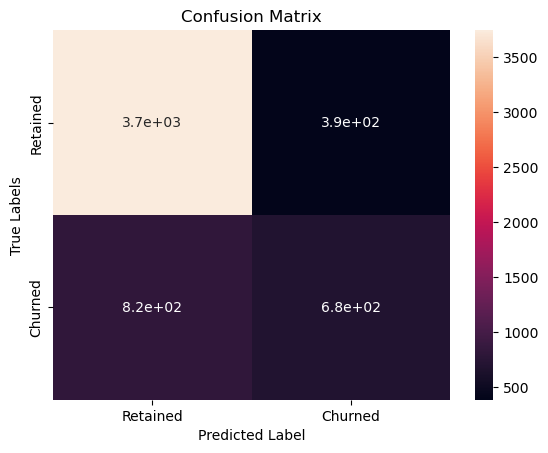

In [30]:
# Get the confusion matrix for both train and test
labels = ["Retained" , "Churned"]
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True , ax = ax)    #annot =True to annotate cells

#labels, title and ticks
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

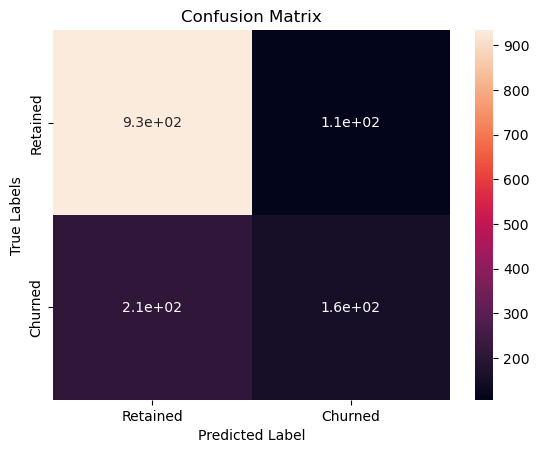

In [29]:
# Get the confusion matrix for both train and test
labels = ["Retained" , "Churned"]
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True , ax = ax)    #annot =True to annotate cells

#labels, title and ticks
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Implementing Cross-validated Logistic Regression